In [1]:







Упражнение 9
Напишите функцию, которая возвращает $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри
Упражнение 10
Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания.

Упражнение 12
Напишите игру life, используя массивы numpy.
Визуализируйте интерактивно ее результаты.

SyntaxError: invalid syntax (<ipython-input-1-72ab05e1ca2c>, line 2)

In [2]:
import numpy as np

Упражнение 1
На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте.

Перемножение матриц размера n на n

In [32]:
import time
import random
import matplotlib.pyplot as plt

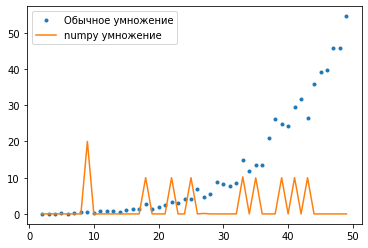

In [33]:


def python_style(a, b):
    """
    Умножение матрицы на матрицу через списки. Возвращает время выполнения умножения
    
    Разные исключения и правильность матриц, поданных на вход, не проверялись, так как задача состояла в том, чтобы
    посчитать время выполнения программы
    """
    start = time.time()
    c = [[0 for i_ in range(len(a))] for j_ in range(len(a))]
    for i in range(len(a)):
        for j in range(len(a)):
            result = 0
            for k in range(len(b)):
                result += a[i][k] * b[k][j]
                c[i][j] = result
    end = time.time()
    return (end-start)

def numpy_style(a, b):
    """
    Умножение матрицы на матрицу с помощью numpy. Возвращает время выполнения умножения
    """
    a, b = np.array(a), np.array(b)
    start = time.time()
    c = a @ b
    end = time.time()
    return (end-start)

# Списки, где будет храниться время выполнения программы для разных размеров матрицы
python_style_list = []
numpy_style_list = []

# Умножаем матрицы размерности от 2 до 50
for n in range(2, 50):
#     Среднее время выполнения умножения для заданной размерности
    python_style_time = 0
    numpy_style_time = 0
#     Проводим эксперимент 10 раз
    for j in range(10):
#         Создаём матрицы
        a = [[random.random() * 100 for i in range(n)] for j in range(n)]
        b = [[random.random() * 100 for i in range(n)] for j in range(n)]
#         Считаем время выполения
#         ВНИМАНИЕ!!! Так как время выполнения умножения через numpy очень маленькое, 
#         то иногда программа просто выводит нуль
#         Поэтому здесь времена умножены на коэффициенты, причём для numpy умножения коэффициент в 100 раз больше, 
#         Значит при построении графика нужно понимать, что фактическое время выполения программ меньше
        python_style_time += python_style(a, b) * 1000
        numpy_style_time += numpy_style(a, b) * 100000
    python_style_list.append(python_style_time / 10)
    numpy_style_list.append(numpy_style_time / 10)
    
# Строим полученные значения
# Получили, что не смотря на то, что время выполения numpy умножения в 100 раз увеличено по сравнению с обычным умножением
# оно всё равно меньше чем время выполнения обычного умножения
plt.plot(range(2, 50), python_style_list, '.', label='Обычное умножение')
plt.plot(range(2, 50), numpy_style_list, '-', label='numpy умножение')
plt.legend()

 Упражнение 2
 
 Создайте массив чисел от 2 до 75. Выведите только нечётные.
 
 Присвойте нечётным числам этого массива значение -1.

In [94]:
a = np.array(range(2, 76))
print(a[a % 2 == 1])
a[a % 2 == 1] = -1
print(a)

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75]
[ 2 -1  4 -1  6 -1  8 -1 10 -1 12 -1 14 -1 16 -1 18 -1 20 -1 22 -1 24 -1
 26 -1 28 -1 30 -1 32 -1 34 -1 36 -1 38 -1 40 -1 42 -1 44 -1 46 -1 48 -1
 50 -1 52 -1 54 -1 56 -1 58 -1 60 -1 62 -1 64 -1 66 -1 68 -1 70 -1 72 -1
 74 -1]


Упражнение 3

Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом.

Приведите примеры использования.

In [98]:
# Массив а - это все числа от 0 до 100
a = np.array(range(101))
# Массив b - это квадраты, меньшие 101
b = np.array([i*i for i in range(101) if i*i < 101 ])
# Убрали из списка чисел 100 все числа, которые являются квадратами
print(np.setdiff1d(a, b))

[ 2  3  5  6  7  8 10 11 12 13 14 15 17 18 19 20 21 22 23 24 26 27 28 29
 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


Упражнение 4

Создайте случайную квадратную матрицу случайного размера от 10 до 100.

Найдите максимум и сумму элементов.

Поделите каждый элемент матрицы на максимум.

Отнимите от каждой строки матрицы среднее по строке.

Замените максимальное значение на -1.

In [188]:
# Создайте случайную квадратную матрицу случайного размера от 10 до 100.
matrix_random = np.random.randint(100, size=(np.random.randint(10, 100), np.random.randint(10, 100)))
print("Размер случайной матрицы", matrix_random.shape, "Её первые 4 числа", matrix_random[0, :4])
# Найдите максимум и сумму элементов.
print("Максимум=", np.max(matrix_random))
print("Сумма=", np.sum(matrix_random))
# Поделите каждый элемент матрицы на максимум.
matrix_random = matrix_random / np.max(matrix_random)
# Отнимите от каждой строки матрицы среднее по строке.
matrix_random -= np.tile(np.mean(matrix_random, axis=1).reshape(len(matrix_random),-1), (1, len(matrix_random[0])))
# Замените максимальное значение на -1.
matrix_random[np.where(matrix_random == np.max(matrix_random))] = -1

Размер случайной матрицы (82, 84) Её первые 4 числа [85 82 19 58]
Максимум= 99
Сумма= 344701


Упражнение 5

Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.


In [39]:
def replace_Nans(a):
#     Проверяем, есть ли в массиве значения не nan
    if all(np.isnan(a)):
        return np.zeros_like(a)
    else:
#         Иначе заполняем nan'ы средним значением
        a[np.isnan(a)] = np.nanmean(a)
        return a

a = np.array([np.nan, np.nan, np.nan])
print(replace_Nans([np.nan, np.nan, np.nan]))
print(replace_Nans(np.array([0, np.nan, 1])))


[0. 0. 0.]
[0.  0.5 1. ]


Упражнение 6

Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$.

In [311]:
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
a = np.array(range(1, 11)).reshape(2, 5)
print(a)
print(normalize(a))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[0.         0.11111111 0.22222222 0.33333333 0.44444444]
 [0.55555556 0.66666667 0.77777778 0.88888889 1.        ]]


Упражнение 7

Запишите numpy-array в файл.

In [272]:
np.savetxt('test_1.txt', np.array(range(10)))

Считайте numpy-array из файла.

In [273]:
b = np.loadtxt('test_1.txt')
print(b)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Упражнение 9

Напишите функцию, которая возвращает $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [76]:
def fill_with_values(n, m, a, b):
    """
    Функция, которая возвращает  𝑛×𝑚  целочисленную матрицу с заданным значением на границах матрицы
    и с заданным значением внутри
    :param n: кол-во строк матрицы
    :param m: кол-во столбцов матрицы
    :param a: значением по краям
    :param b: значения в центре
    """
    matrix_ = np.full((n, m), b)
    matrix_[0, :] = a
    matrix_[-1, :] = a
    matrix_[:, 0] = a
    matrix_[:, -1] = a
    return matrix_
print(fill_with_values(4, 5, 1, 0))

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


Упражнение 10

Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания.

In [67]:
def sort_rows_with_columns(a, i):
    """
    Функция, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания.
    :param a: матрица
    :param i: номер столбца
    """
    ind_c = np.argsort(a, axis=0)
    return a[ind_c[:, i]]
a = np.array([[1, 3, 1], [3, 2, 2], [2, 1, 3]])
print("a=", a)
print("a_sort=", sort_rows_with_columns(a, 1))

a= [[1 3 1]
 [3 2 2]
 [2 1 3]]
a_sort= [[2 1 3]
 [3 2 2]
 [1 3 1]]


Упражнение 11

Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


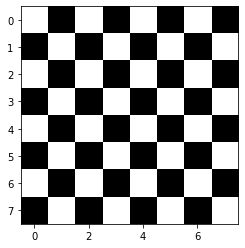

In [41]:
import matplotlib.pyplot as plt
def chess_desk(n):
#     Создаём матрицу соответсвующего размера с нулями
    a = np.array(range(n*n)).reshape(n, n)
#     Заполняем её единицами и нулями через один
    print(np.where(((a % 2 == 0) & ((a // n) % 2 == 0)) | ((a % 2 == 1) & ((a // n) % 2 == 1)), 1, 0))
#     Сделаем красивую визуализацию
    palette = np.array([[0, 0, 0],         # black
                        [255, 255, 255]])  # white
    plt.imshow(palette[np.where(((a % 2 == 0) & ((a // n) % 2 == 0)) | ((a % 2 == 1) & ((a // n) % 2 == 1)), 1, 0)])

chess_desk(8)
